In [98]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [99]:
TRAIN_DATASET_PATH = '../housing_train.csv'

In [100]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [101]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.330277,1.036473,1.025853,-1.137723,-1.348849,-0.982678,-0.978640,2.959952,452600.0,-0.189052,-0.034234,-0.021407,-0.01009,-0.560393,-0.881005,-0.704248,-0.015954,2.901549,-0.376027
1,-1.325291,1.027171,-0.603438,3.450773,2.196127,0.855759,1.661028,2.944799,358500.0,-0.189052,-0.034234,-0.021407,-0.01009,-0.618133,-0.881005,-0.704248,-0.015954,2.901549,-0.376027
2,-1.335263,1.022519,1.921963,-0.704623,-1.127515,-0.828811,-0.845613,2.280068,352100.0,-0.189052,-0.034234,-0.021407,-0.01009,-0.618366,-0.881005,-0.704248,-0.015954,2.901549,-0.376027
3,-1.340249,1.022519,1.921963,-0.847022,-0.964235,-0.773985,-0.736062,1.252220,341300.0,-0.189052,-0.034234,-0.021407,-0.01009,-0.410101,-0.881005,-0.704248,-0.015954,2.901549,-0.376027


In [102]:
feature_names = df.columns.tolist()
feature_names.remove('median_house_value')

target_name = 'median_house_value'

In [103]:
X = df[feature_names]
y = df[target_name]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [105]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

R2:	0.618
MAE:	44193.665
MSE:	3591334989.431


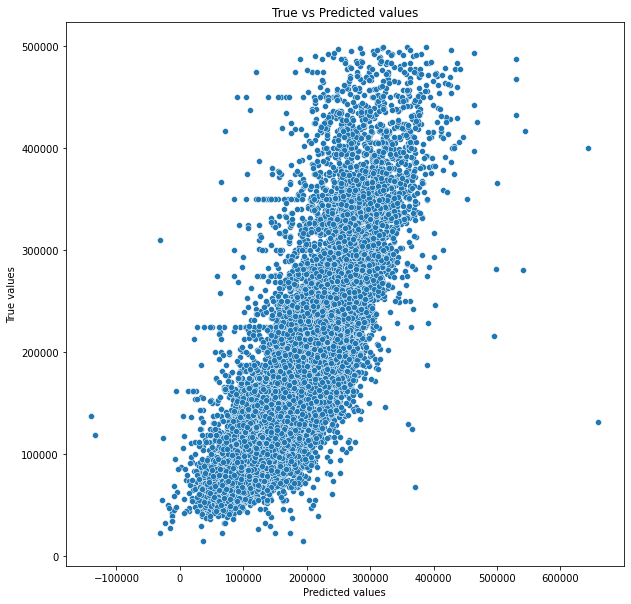

In [106]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.6
MAE:	45464.324
MSE:	3786047294.897


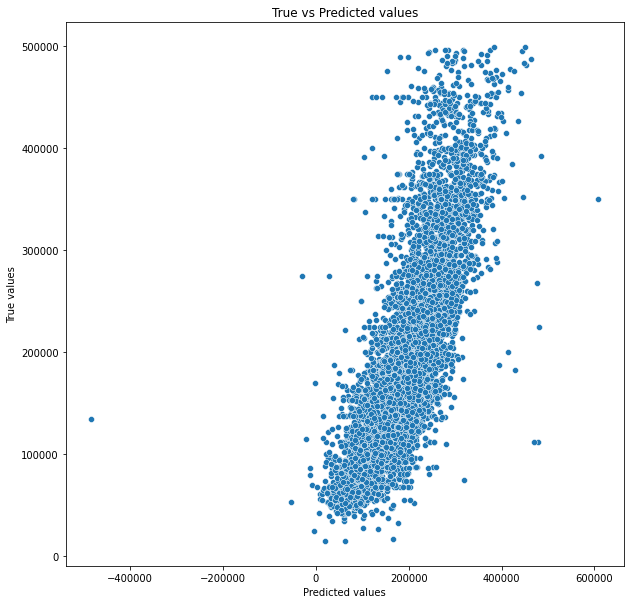

In [107]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [108]:
rf_model = RandomForestRegressor(max_depth=6)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6)

R2:	0.705
MAE:	38260.406
MSE:	2776507486.261


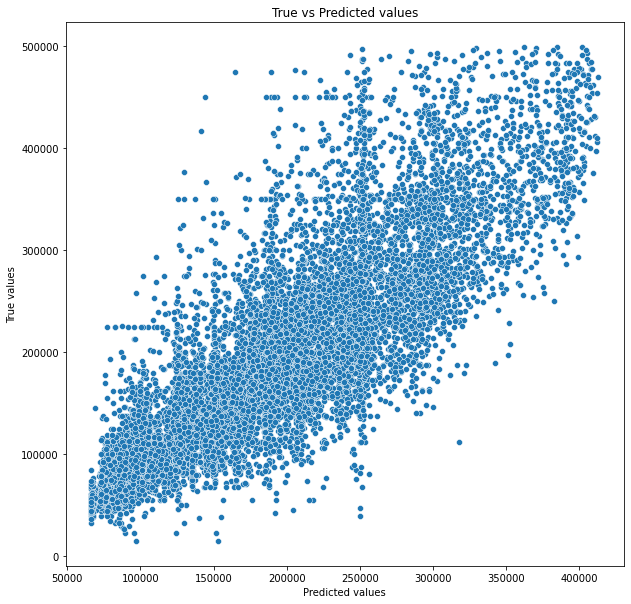

In [109]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.663
MAE:	40647.466
MSE:	3192167390.569


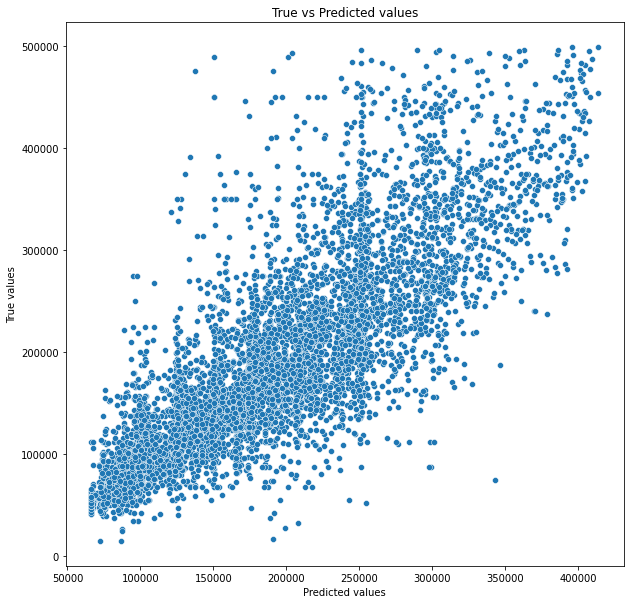

In [110]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [111]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

R2:	0.765
MAE:	33417.715
MSE:	2216543632.34


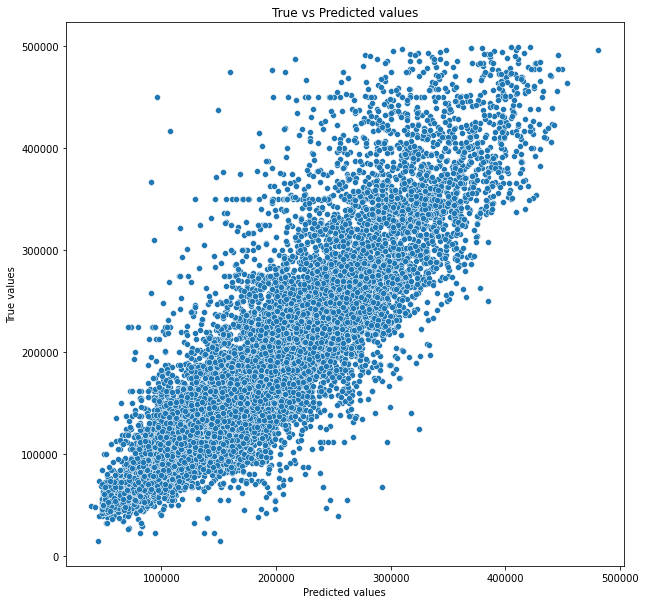

In [112]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.735
MAE:	35433.002
MSE:	2504651892.302


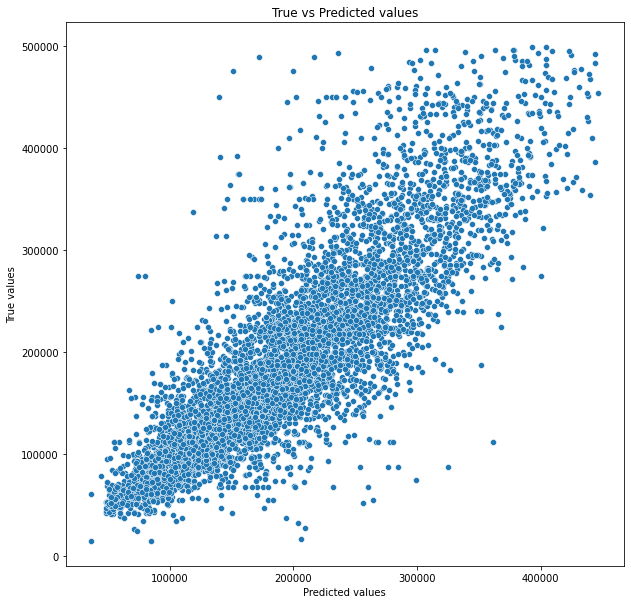

In [113]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)